# HW 0 

In [200]:
import matplotlib.pyplot as plt
palette = plt.get_cmap('Set1')
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import preprocessing


pd.set_option('display.max_rows', 500)

# PCA and Eigenanalysis of Olympic Medal Counts over Time

The file oly_medal_counts.csv contains the total number of Olympic medals won by each country in that year since 1896. In this HW we will study the trends in the medal counts over time and learn how to extract these trends as features or responses through principal components analysis.

Each section will have a prompt to guide you through the analysis. Make sure that the code you write goes in the proper cell for that question. Specific grading criteria/points are also provided for each question.

### 0. Getting Started


For me I always find it easier to code with the right music. Here is a playlist I made for y'all based on what I was listening to when I was making the assignment:

https://open.spotify.com/playlist/67Bjz4tD2BWGOPBlMGG8Yp?si=2591378e0d984bdf

I hope it helps give you momentum for this notebook. :) 

###  Read in the Data

Read in the data as a pandas dataframe, letting the row names be the country names and the column names be the year of the Olympic games. We will take each country as an individual observation, and take the row corresponding to the $i^{th}$ country as the data vector $x_i,~i=1,...,n$. 

Convert the medal counts to numeric. If there are any NA counts, replace them with 0s.

In [203]:
# IS THIS THE BEST WAY TO DROP AND THEN ADD A ROW BACK? IT SEEMS INEFFICENT
df = pd.read_csv('/Users/jakecosgrove/Documents/Advanced ML (MSDS603) /Homeworks/hw0-Jcosgrove99/oly_medal_counts.csv')
df1 = df.drop('Country', axis=1).apply(pd.to_numeric,errors='coerce')
df1 = df1.astype(float)
df1.insert(0,'Country',df['Country'],True)
# checking for null values 
print(df1.isna().sum().sum() == 0)

True


In [22]:
# df1T = df1.T.reset_index()
# df1T.columns = df1T.iloc[0]
# df1T = df1T.iloc[1:]


???

,Country,United States,Mixed team,Australia,Switzerland,Austria,Denmark,Hungary,Great Britain,France,...,Grenada,Botswana,Montenegro,Cyprus,Bahrain,Guatemala,Gabon,Kosovo,Fiji,Jordan
1,1896,20.0,2.0,2.0,3.0,5.0,6.0,6.0,7.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900,48.0,20.0,5.0,9.0,6.0,6.0,5.0,32.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1904,231.0,4.0,4.0,3.0,3.0,0.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1906,24.0,2.0,3.0,8.0,9.0,6.0,10.0,24.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1908,47.0,0.0,0.0,0.0,1.0,5.0,9.0,146.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. EDA (10 pts)

Create a "spaghetti plot" of the medal counts over time. In other words, for each country, plot a trajectory with the year on the x-axis and the nation's medal count on the y-axis. (2pts)

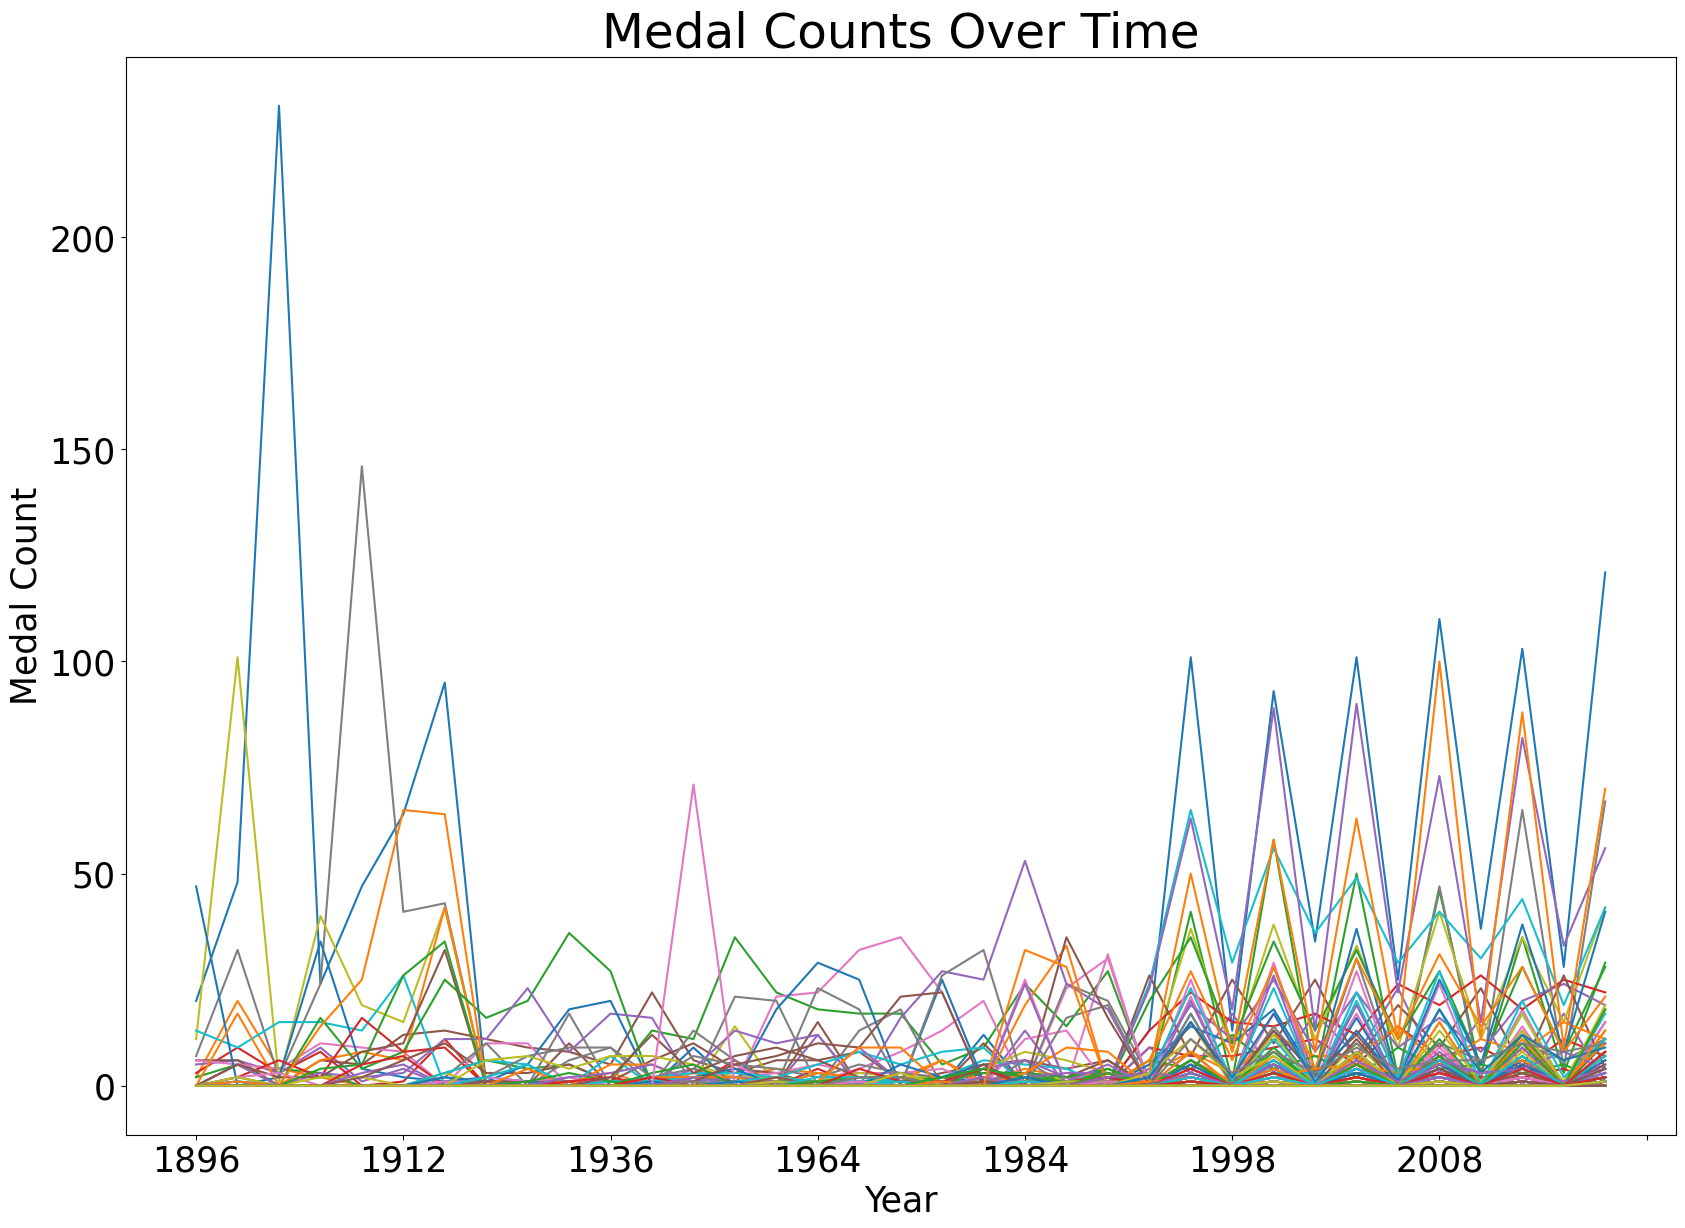

In [204]:
# Creating transposed index of dataframe
df_wide = df1.T.reset_index()
df_wide.columns = df_wide.iloc[0]
df_wide = df_wide.set_index('Country')
df_wide = df_wide.rename_axis('Year')
df_wide = df_wide.iloc[1:]

# Creating spaghetti plot from matplotlib
plot = df_wide.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Medal Counts Over Time',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

There is a noticeable shift in the trends starting at 1994. Describe the pattern that you see emerge **starting from 1994 onward**. (2pts)  

<font color=#FF6666> From 1994 onward the Olympic Medal Counts for each country becomes more consistent. The more winning countries tend to stay above the mean medal count while less winning countries tend to stay below the mean, without very large changes in relative position of medal counts. </font>

Speculate as to why this change occurred (it may be helpful to do a bit of research on the history of the Olympics here). (1pts)

<font color=#FF6666> Through looking at brief history of the olypmic games, a few speculations as to why olpymic medal winnings began to become more consistnent in the start of the 1990's may be for two reason. First by the end of the 1980's is the first time that countries begin consistently competing in the olympics without droping out due to protest or war. The 1900's had both the World Wars as well as much political term oil around the globe which most likely created instability in what countries participated. Secondly in 1988 the olympics no longer required participants to have an amature status. This most likely opened the olympic games to a large number of athletes that otherwise would not have competed. This probably increased the quality of the games in turn increasing the desire for athletes to comptete in it. </font>

Let's focus on the trend after 1994 and call this the "recent" era of the Olympics. Subset the data frame to contain years from 1994 onward (including 1994). (1pt)

In [205]:
df_wide.index = df_wide.index.astype(int)
df_recent_wide = df_wide[df_wide.index > 1993]

Calculate the total number of medals won for each year and visualize them. (1pt)

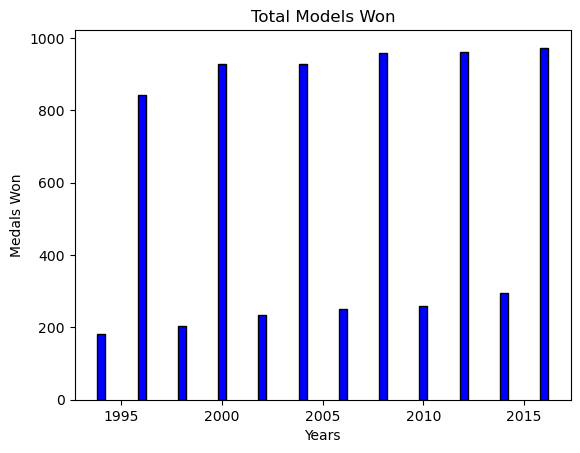

In [206]:
df_recent_totals = df_recent_wide.sum(axis=1)
df_recent_totals = df_recent_totals.reset_index()
# df_recent_totals = df_recent_totals.to_frame()
df_recent_totals.rename(columns={0:'Totals'})
# # df_recent_totals= df_recent_totals.set_index('year')

x = df_recent_totals['Year']
# code to locat the 2 column in the df
y = df_recent_totals.iloc[:,1]
plt.bar(x, y, color='blue', width=0.4, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Medals Won')
plt.title('Total Models Won')
plt.show()

Are the total number medals won constant across years? Why or why not? (1pt)

<font color=#FF6666> No the medals are not constant acorss the years, as it appears that the summer and winter olympics have different total medals won. If you look at the total medals won grouped by summer or winter olympics then the number of medals will apear more constant, although it still seems to be trending slightly upward in terms of total medals won. </font>

To make a fair comparison of country performance, it makes more sense for us to look at the fraction of medals won per year. Convert your raw medal counts to the relative percentage of medals won per year and visualize it with another spaghetti plot (2pts). 

In [208]:
# Turning both dataframes into the fraction of medals won per year
df_wide['Total Medals'] = df_wide.sum(axis=1)
df_wide = df_wide.div(df_wide['Total Medals'], axis=0)
df_wide = df_wide.drop(columns='Total Medals')

df_recent_wide = df_wide[df_wide.index > 1993]

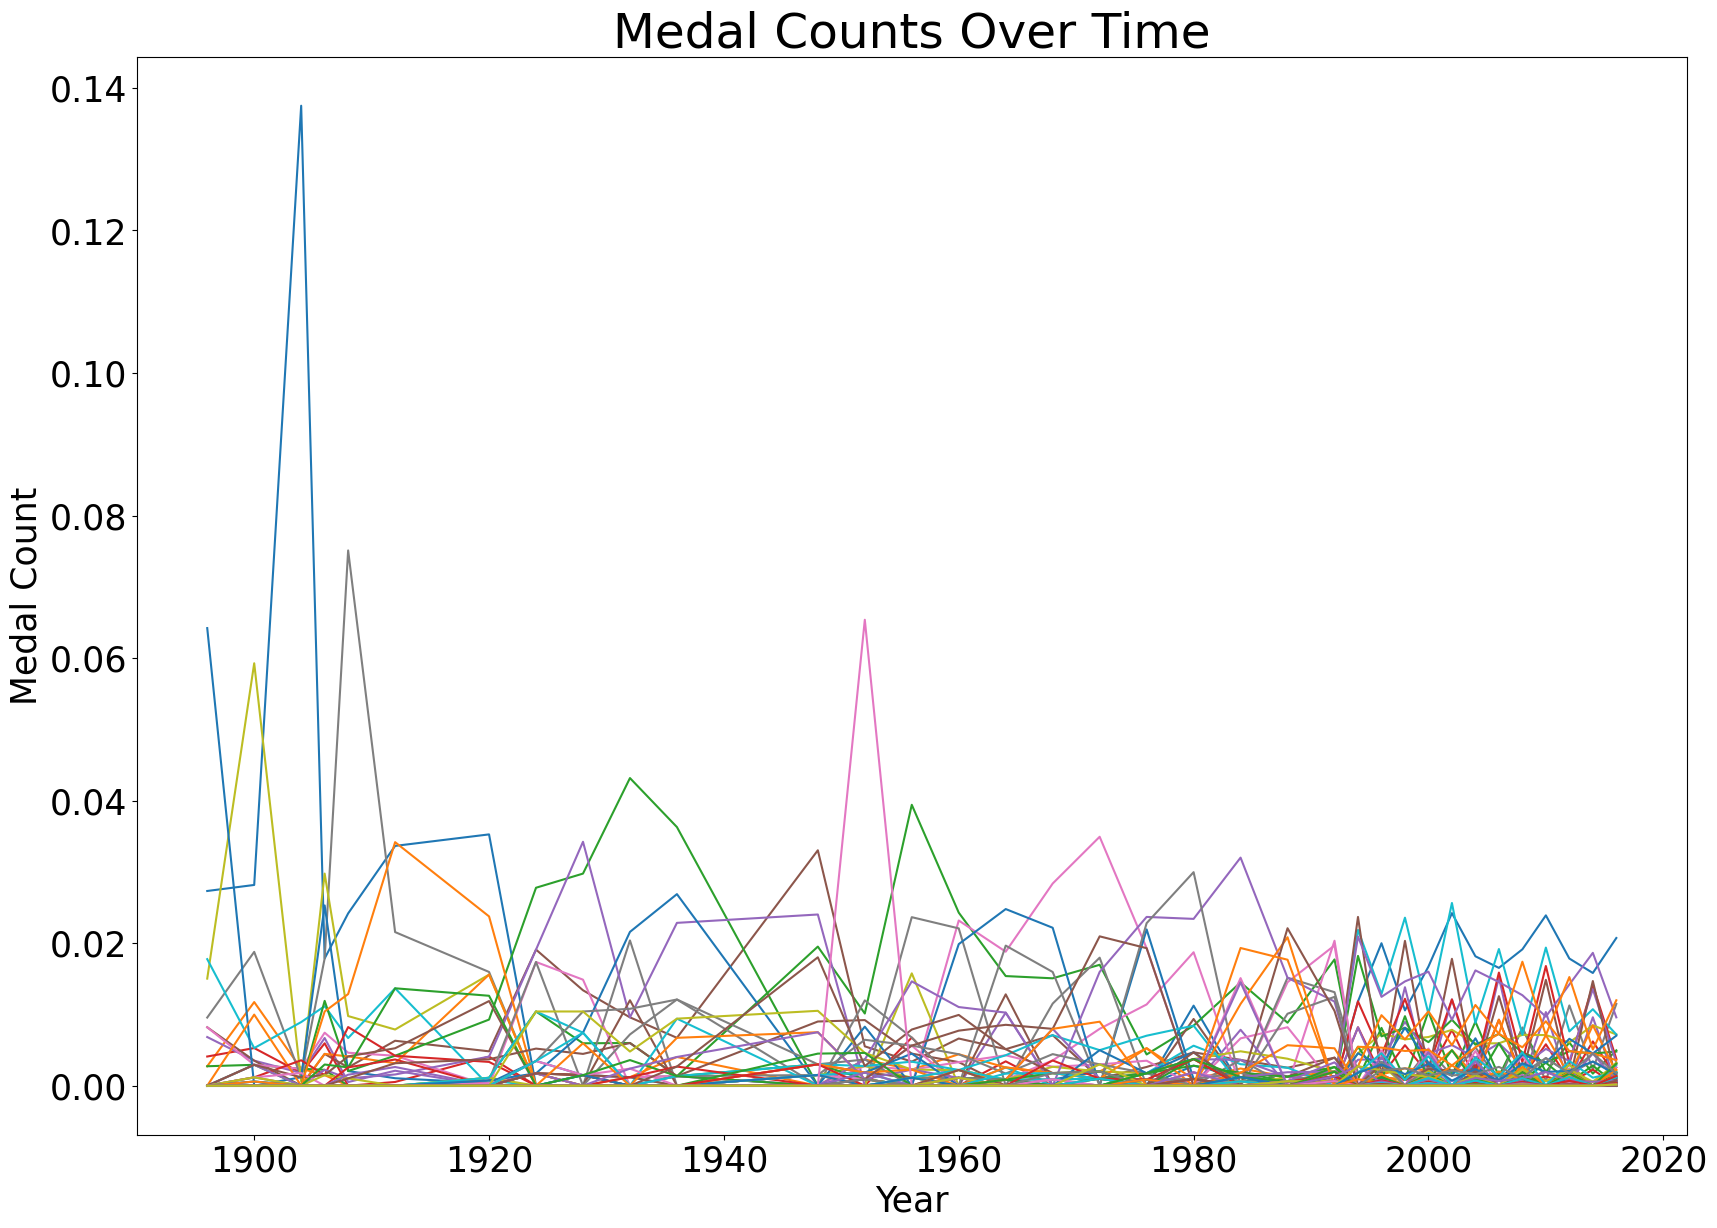

In [130]:
# Creating spaghetti plot from matplotlib for entire data
plot = df1T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Medal Counts Over Time (Entire Data)',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

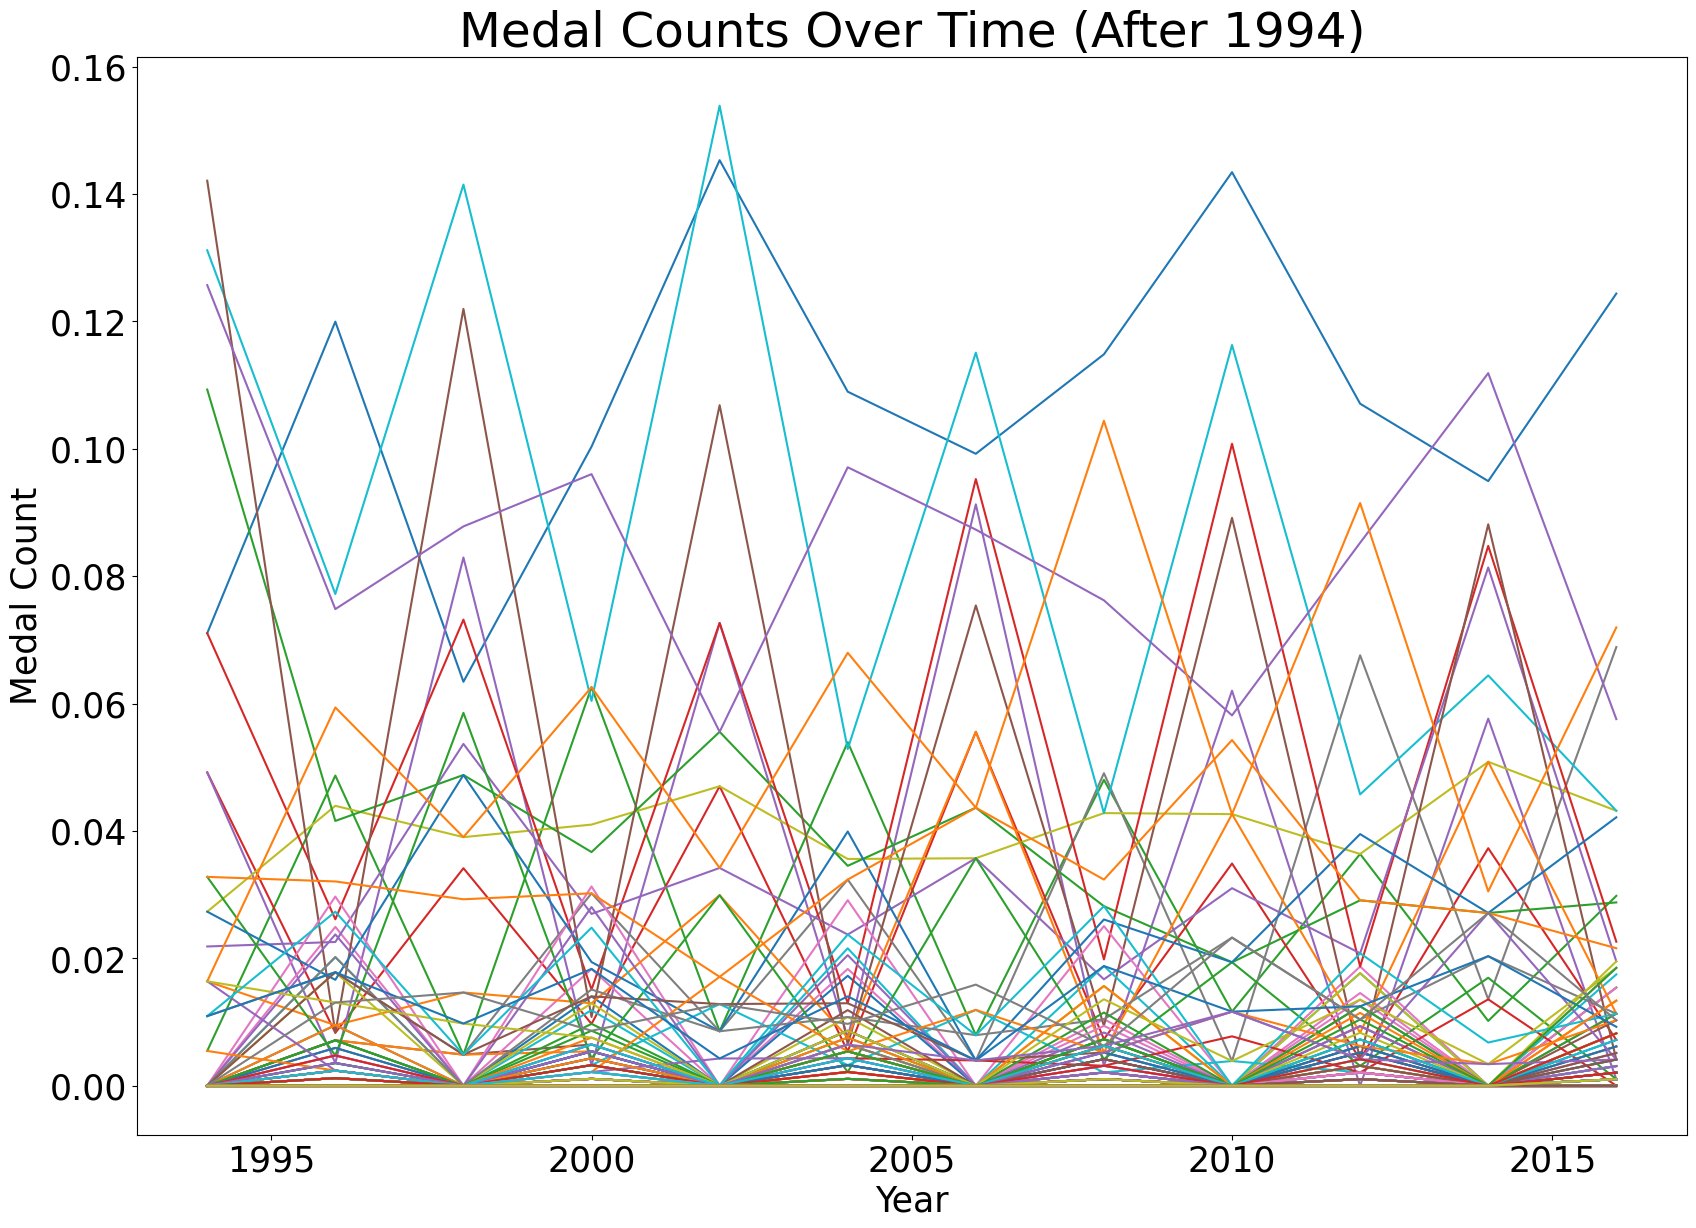

In [209]:
# Creating spaghetti plot from matplotlib
plot = df_recent_wide.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Medal Counts Over Time (After 1994)',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

### 3.  PCA, Eigenanalysis, and Identifying Archetypes (40 pts)

Let's fit a principal components analysis on the dataset, taking each country as the observational unit. 

Create a scree plot from the PCA results. (2pts)

In [286]:
# rank k approximations,is fine to just do 2 
# Centering data before doing PCA
mean_freq = df_recent_wide.mean()

df_recent_wide = df_recent_wide.apply(lambda x: x-x.mean())

Determine the number of principal components needed in order for the low rank approximation to recreate at least 80% of the variation present in the initial data. Call this number K. (2pts) 

In [287]:
pca = PCA()
pca.fit(df_recent_wide.T)

PCA()

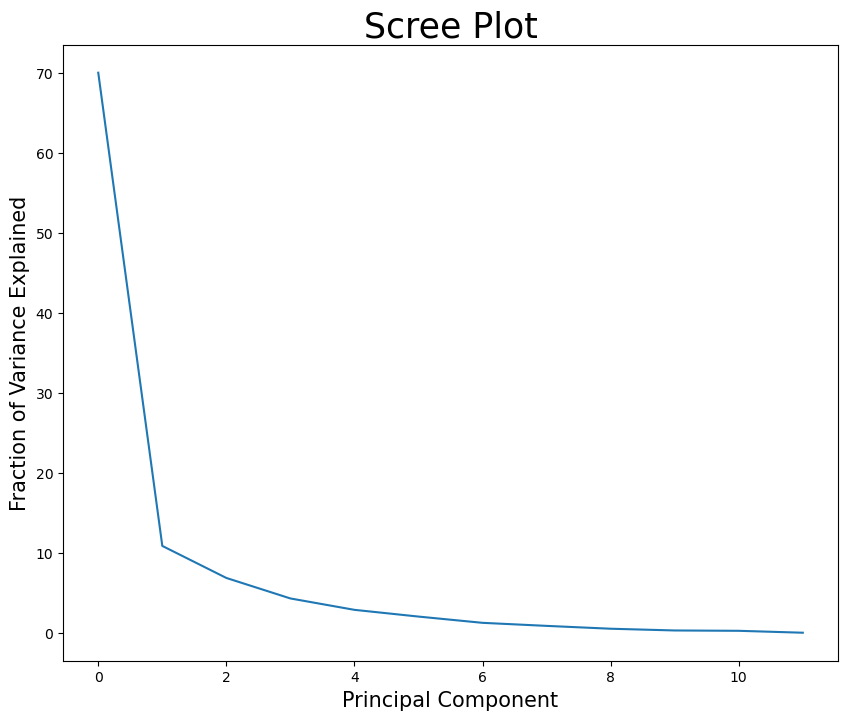

In [288]:
per_var = 100*pca.explained_variance_ratio_
labels = ['PC' + str(x) for x in range(1, len(per_var))]

plt.figure(figsize=(10,8))
plt.plot(per_var)
plt.ylabel('Fraction of Variance Explained', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Scree Plot', fontsize=25)
plt.show()

In [289]:
counter = 0
pcak = 0
for x in per_var:
    counter += x
    if counter <= 80: 
        pcak += 1
# it takes 6 principal components, however we are just going to use k = 2
print('It takes',pcak,
      'principal components in order for the low rank approximation to recreate at least 80% of the variation present in the initial data.')


It takes 1 principal components in order for the low rank approximation to recreate at least 80% of the variation present in the initial data.


For each of the following countries, calculate the rank K approximation:

-China

-Norway 

-Russia

-United States

(4pts total, 1 pt for each country).

For those 4 countries, plot the original data vs. the rank K approximation. (4 pts total, 1 pt per country)

<font color=#FF6666> I was not able to figure out how to create the rank K approximations. </font>

In [290]:
# doing PCA on data frame from 1994 on
pca = PCA(n_components=2)

eigenvecs = pca.fit_transform(df_recent_wide)
eigenvecs_df = pd.DataFrame(data = eigenvecs, 
                            columns = [r'$\hat{\phi}_1$', r'$\hat{\phi}_2$'],
                            index = np.arange(1, 13, 1))
# remember eigen functions are unique up to the sign flip

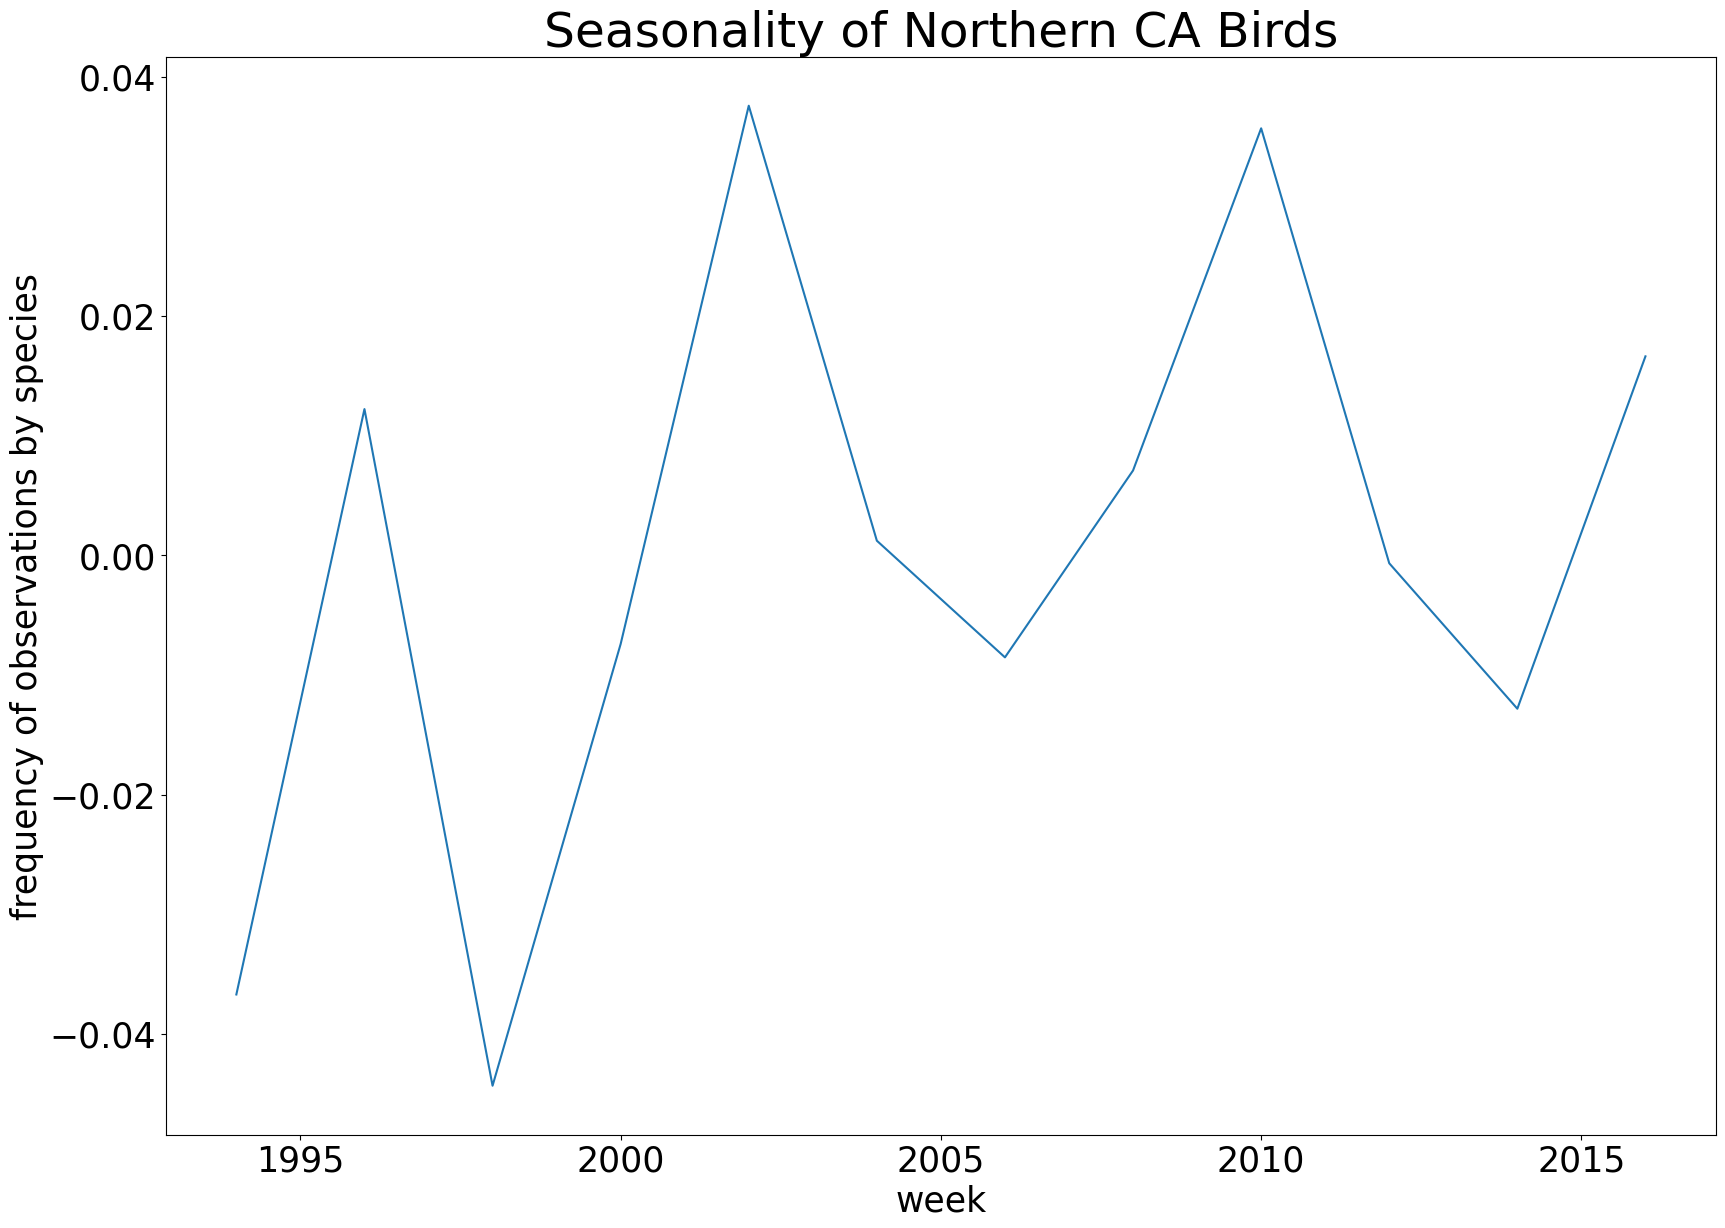

In [297]:
# Lets just plot US
us = df_recent_wide.T[df_recent_wide.T.index == 'United States']
# Now how do predict values?
plot = us.T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='US Medal Count',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("frequency of Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

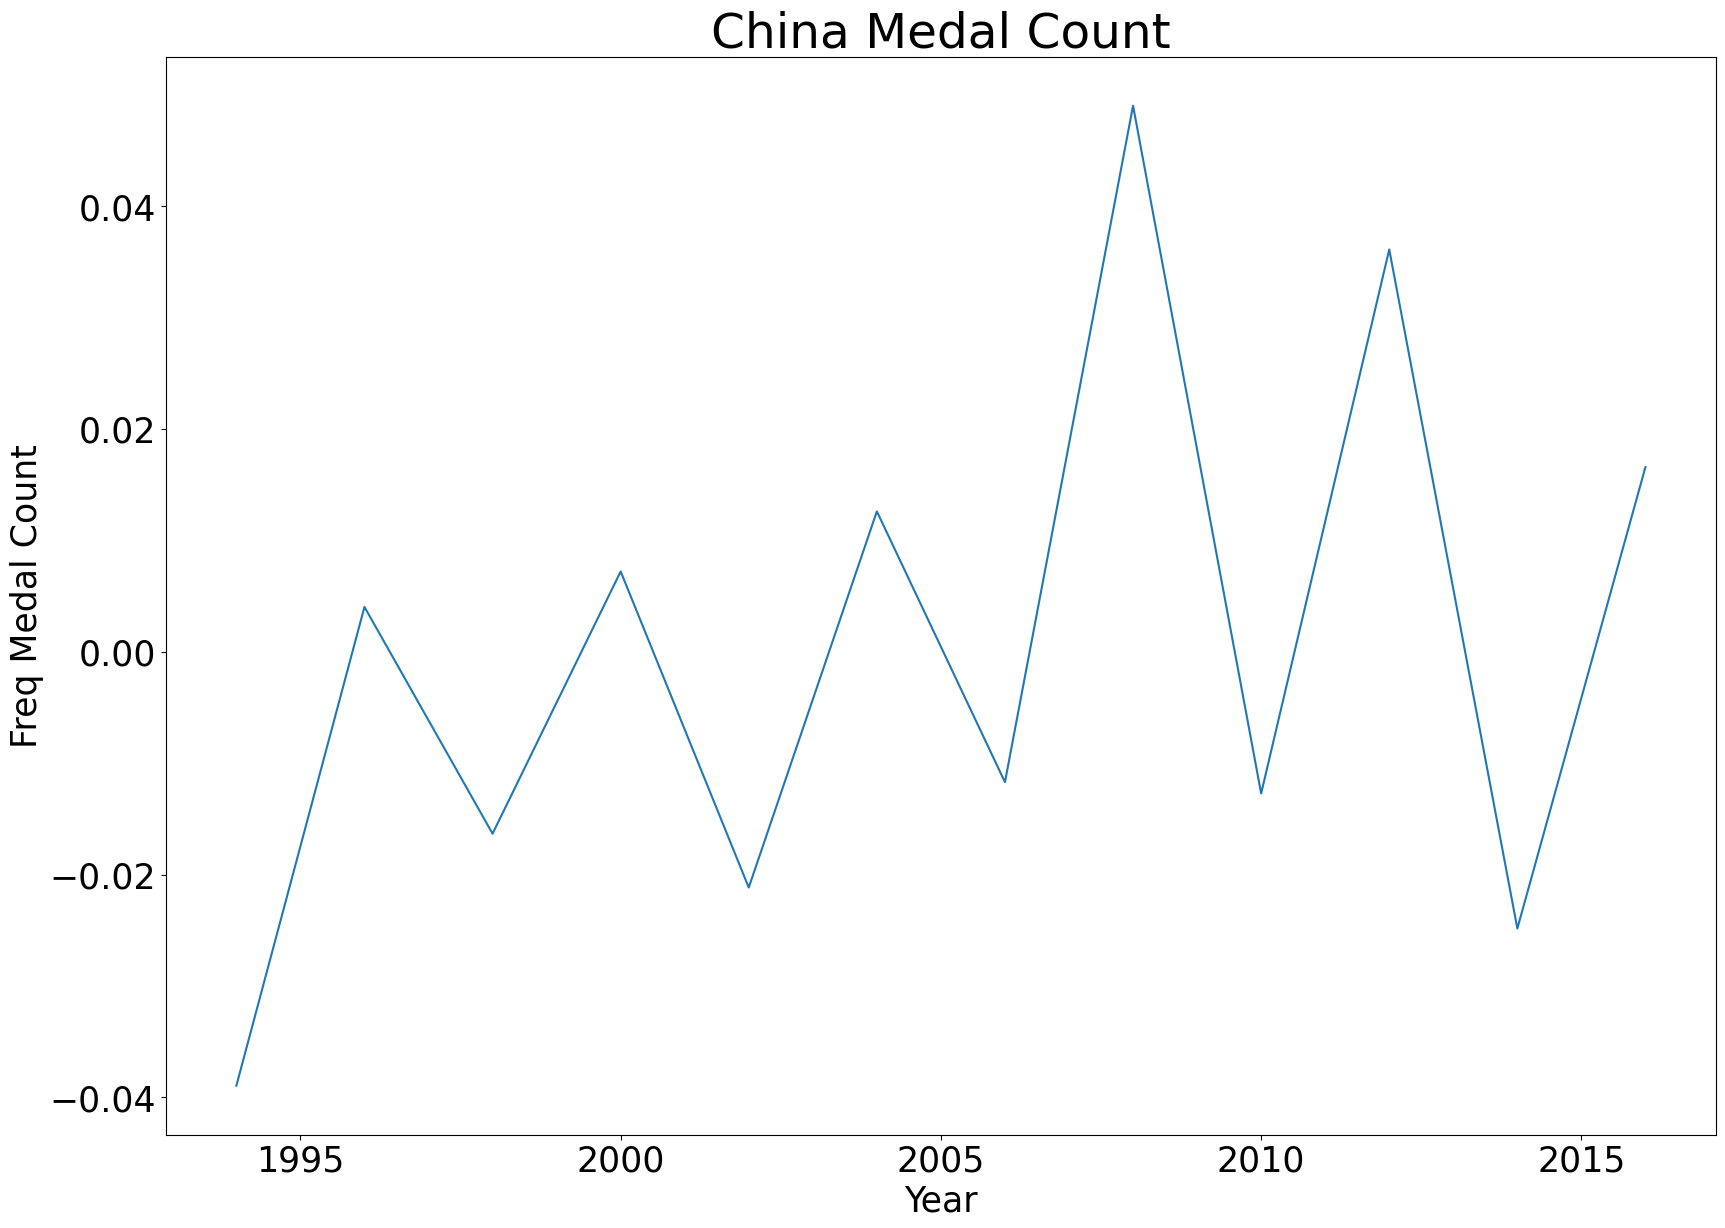

In [298]:
# Lets just plot China
china = df_recent_wide.T[df_recent_wide.T.index == 'China']
# Now how do predict values?
plot = china.T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='China Medal Count',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("Frequency Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

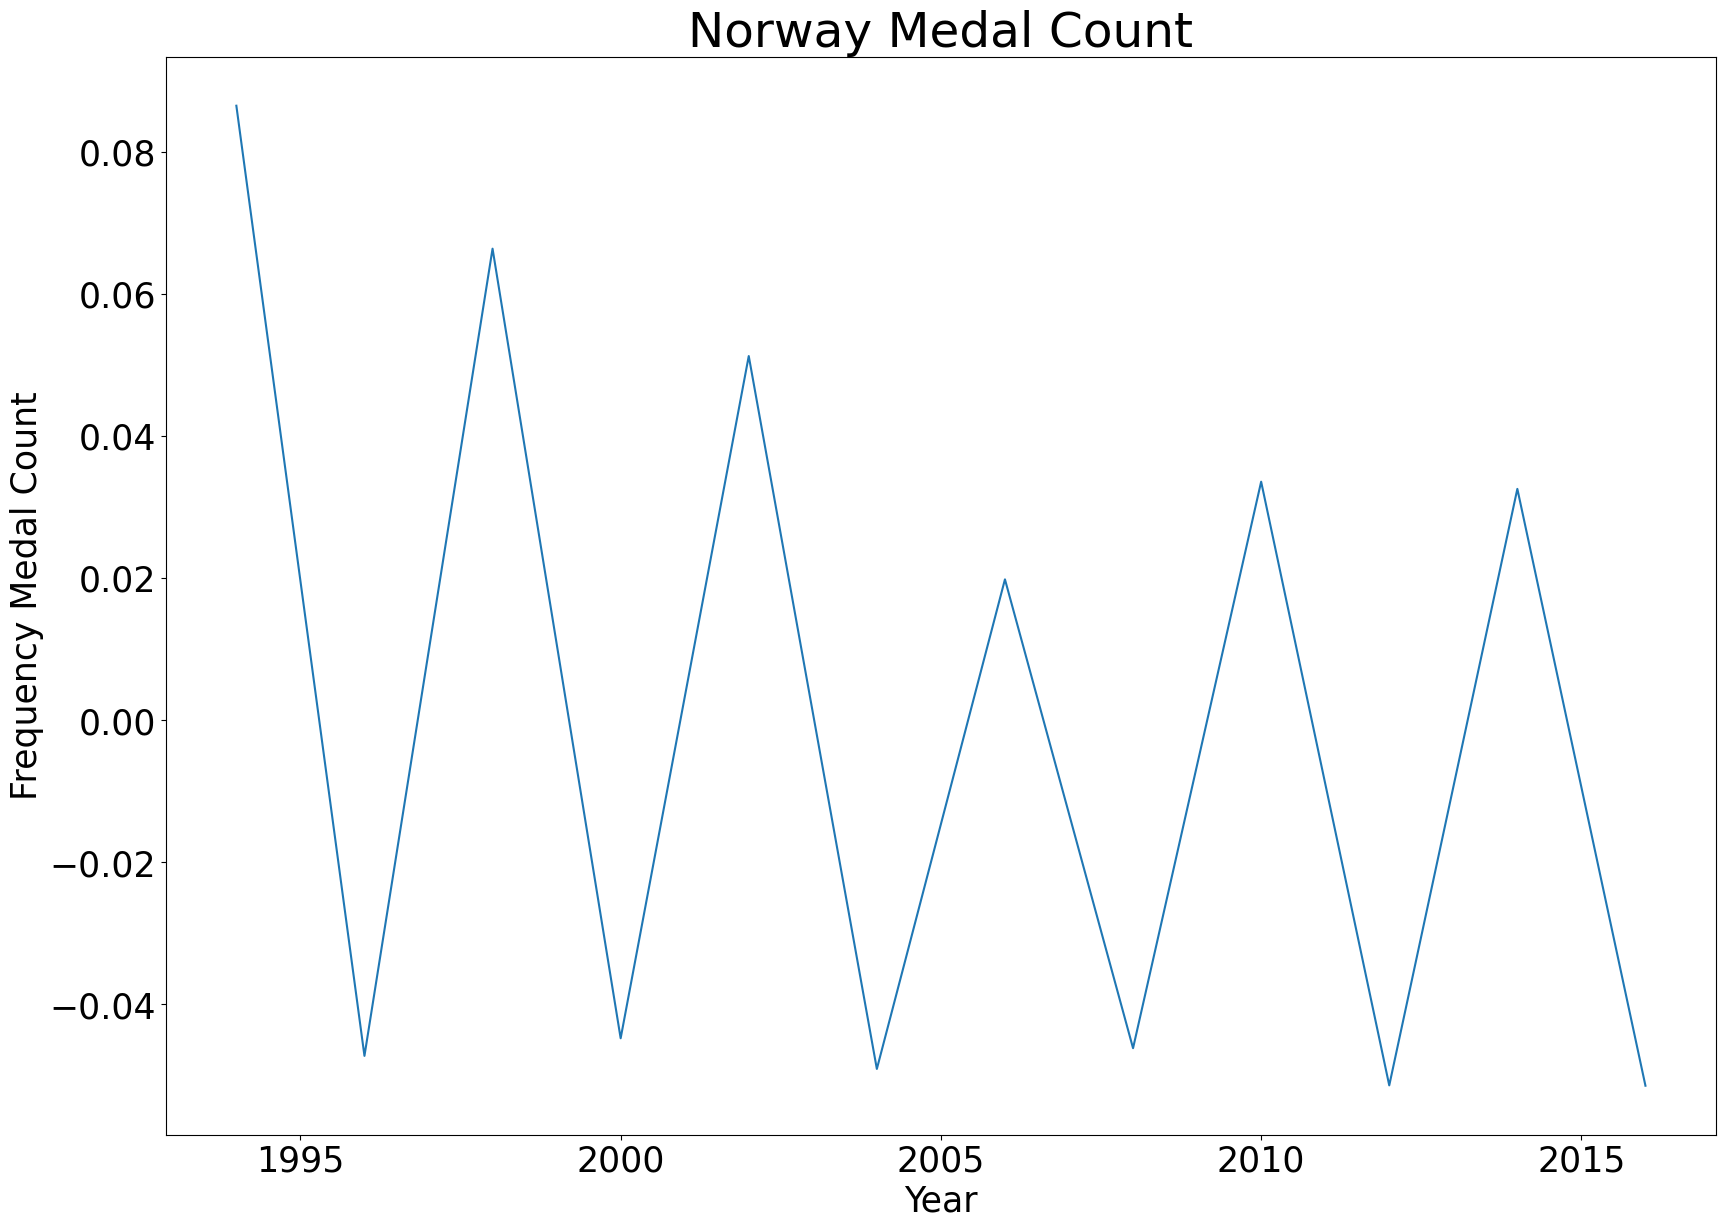

In [299]:
# Lets just plot Norway
norway = df_recent_wide.T[df_recent_wide.T.index == 'Norway']
# Now how do predict values?
plot = norway.T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Norway Medal Count',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("Frequency Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

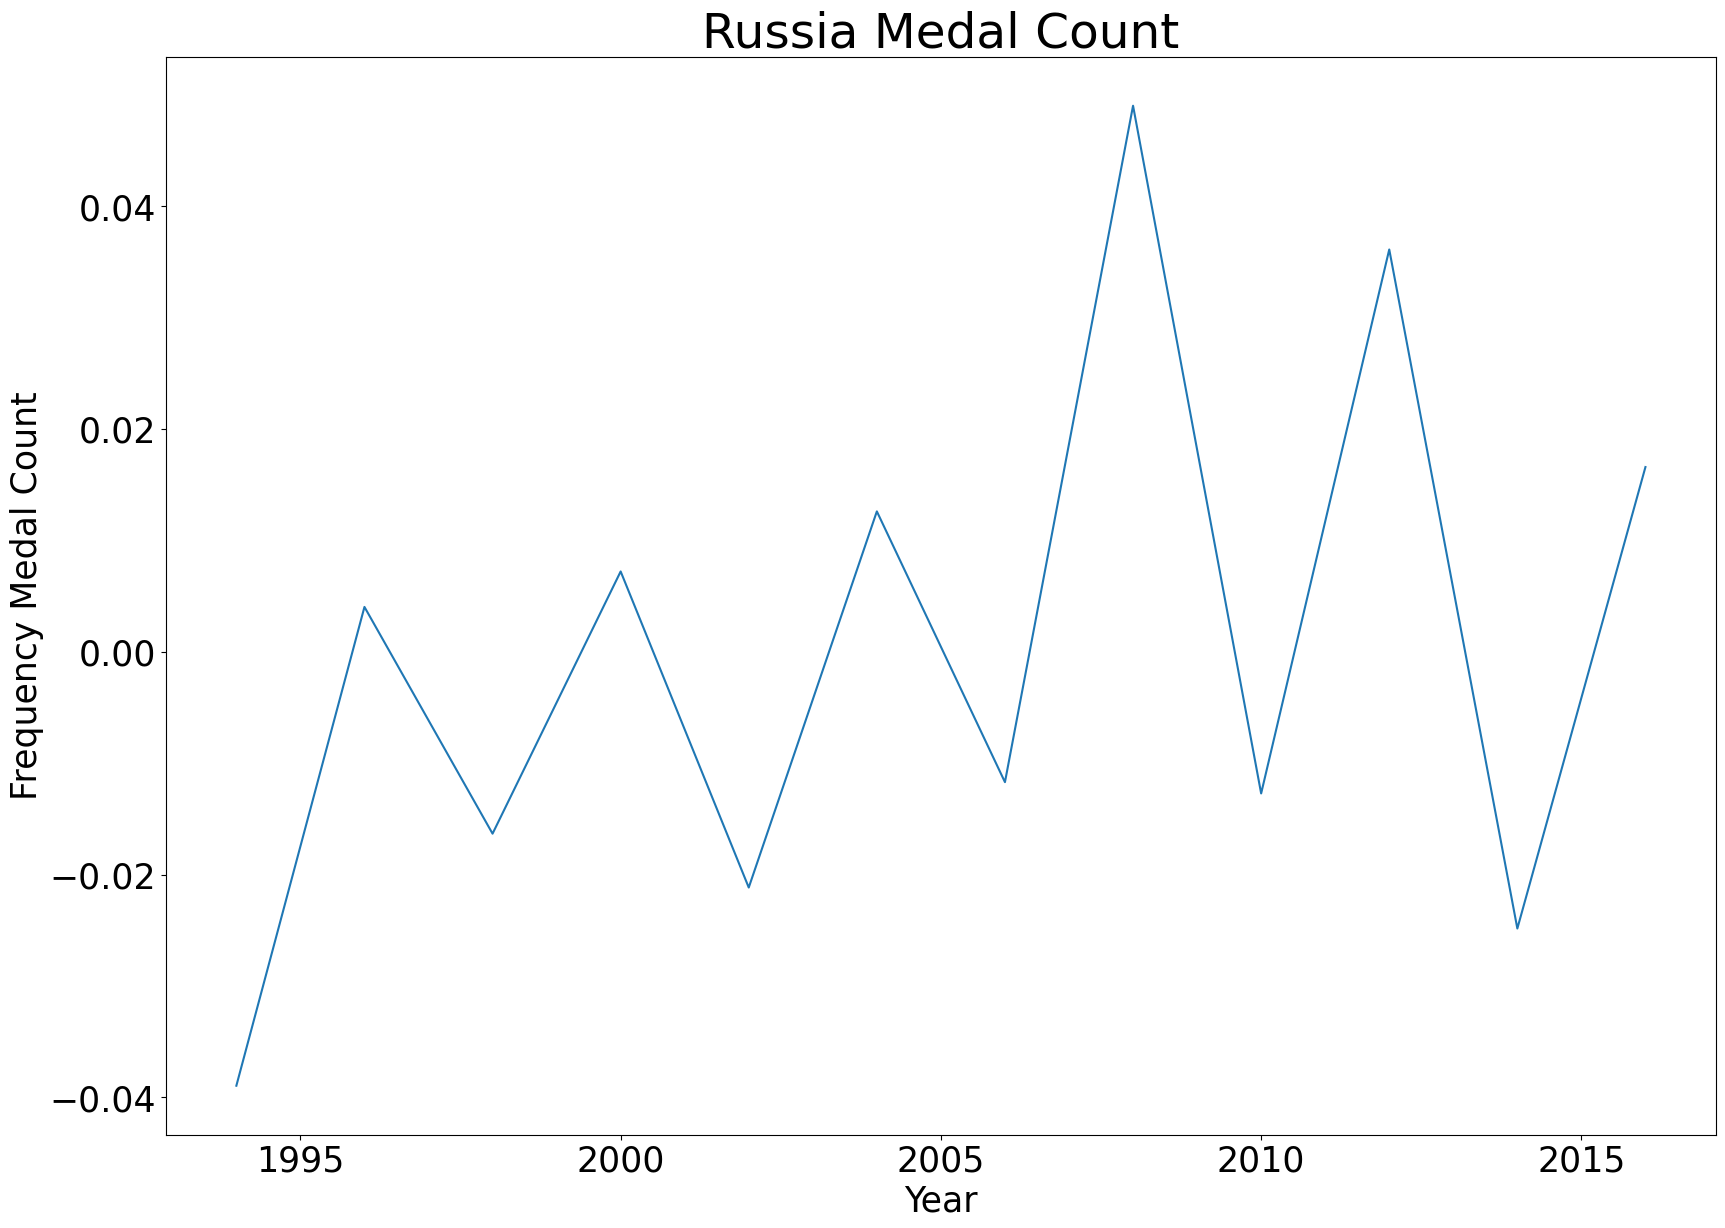

In [300]:
 # Lets just plot China
russia = df_recent_wide.T[df_recent_wide.T.index == 'Russia']
# Now how do predict values?
plot = china.T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Russia Medal Count',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("Frequency Medal Count", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
fig = plot.get_figure()

In [ ]:
# Column one is eigen vector 1 and column two is eigen vector 2 
eigenvecs_df['Year'] = df_recent_wide.index
eigenvecs_df = eigenvecs_df.set_index('Year')

Visualize the first two principal component vectors. (2 pts, one per PC vector)

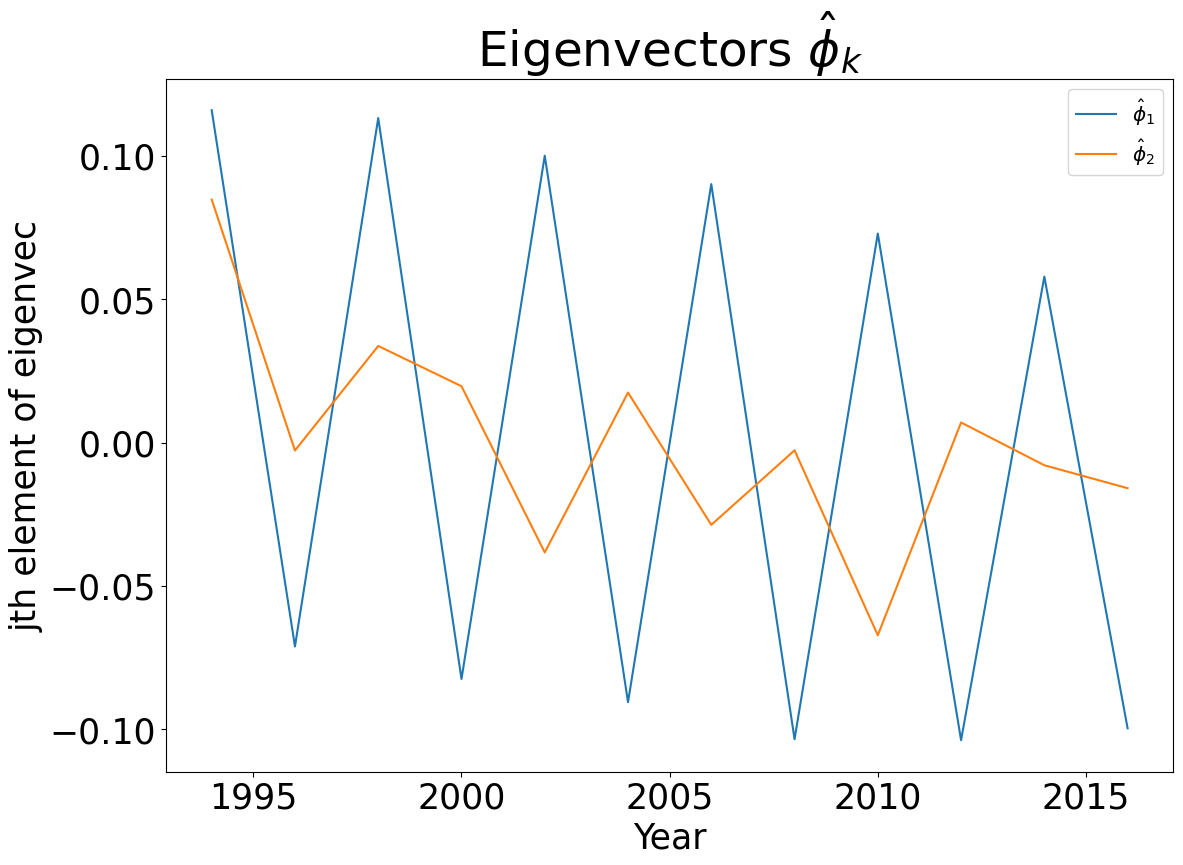

In [294]:
plot = eigenvecs_df.plot(figsize = (13, 9), 
                        title='Eigenvectors '+r'$\hat{\phi}_k$',
                        fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("jth element of eigenvec", fontsize=25)
plot.set_xlabel("Year", fontsize=25)
plot.legend(loc=1, fontsize = 'x-large')
fig = plot.get_figure()

Focus on the first principal component for now. How can we interpret this principal component vector? (2pt)

<font color=#FF6666> The first principal component can be interpreted as contrast between medals won in the summer vs. winter olympics. The graph shows how during the winter olympics (1994, 2000, ..., 2014) the PC1 value is high, while during the summer olympics (1996, 2000, ..., 2016) the value of PC1 is low. </font>

If a country has a high PC1 score, what does that tell us about that country's historical performance at the summer and winter Olympics? (2pts)

<font color=#FF6666> A country with a high PC1 value would win alot of medals during the winter olympics while not winning very many medals during the summer olympics. </font>

Compare the PC1 scores for China, Norway, Russia, and the United States. Which of them has the highest PC1 score? The lowest? (2pts) [Double check that this result aligns with your interpretation of the first principal component vector. ]

In [251]:
scores = pd.DataFrame(data = np.dot(df_recent_wide.T, eigenvecs),
                      columns = ['PC1_score', 'PC2_score'],  
                      index =  df_recent_wide.columns)
print('China PC1 Score:', round(scores.loc['China','PC1_score'],5), '& PC2 Score:', round(scores.loc['China','PC2_score'],5))
print('Norway PC1 Score:', round(scores.loc['Norway','PC1_score'],5), '& PC2 Score:', round(scores.loc['Norway','PC2_score'],5))
print('Russia PC1 Score:', round(scores.loc['Russia','PC1_score'],5), '& PC2 Score:', round(scores.loc['Russia','PC2_score'],5))
print('United States PC1 Score:', round(scores.loc['United States','PC1_score'],5), '& PC2 Score:', round(scores.loc['United States','PC2_score'],5))

China PC1 Score: -0.02441 & PC2 Score: -0.00145
Norway PC1 Score: 0.05554 & PC2 Score: 0.0035
Russia PC1 Score: 0.00423 & PC2 Score: 0.00712
United States PC1 Score: -0.00711 & PC2 Score: -0.00854


<font color=#FF6666> Norway has the highest PC1 scores and China has the lowest PC1 scores. These results align with my interpretation of the first principal component vector becasue Norway is known for being a over preformer in the winter olympics due to the cold weather that the country has. </font>

#### The second principal component is harder to interpret, but there is a general trend in which earlier components are more positive and later components are closer to 0 or more negative. For this reason, we will interpret this component loosely as a general contrast between earlier years and more recent years. 

If a country has a high PC2 score, what does that tell us about that country's historical performance at the Olympics? (2pts)

<font color=#FF6666> If a country has a high PC2 score than it is likely that the country preformed better in the earlier years, closer to 1994, than in the more recent years, closer to 2016. </font>

Create a scatter plot of the principal component scores, with the first PC score on the x-axis and the second PC score on the y-axis. (2pts)

Label the points with the name of their corresponding countries if the first PC score has an absolute value greater than 0.01 or the second PC score has a magnitude greater than 0.0025. (2pts)

Text(0.5, 0, 'PC1')

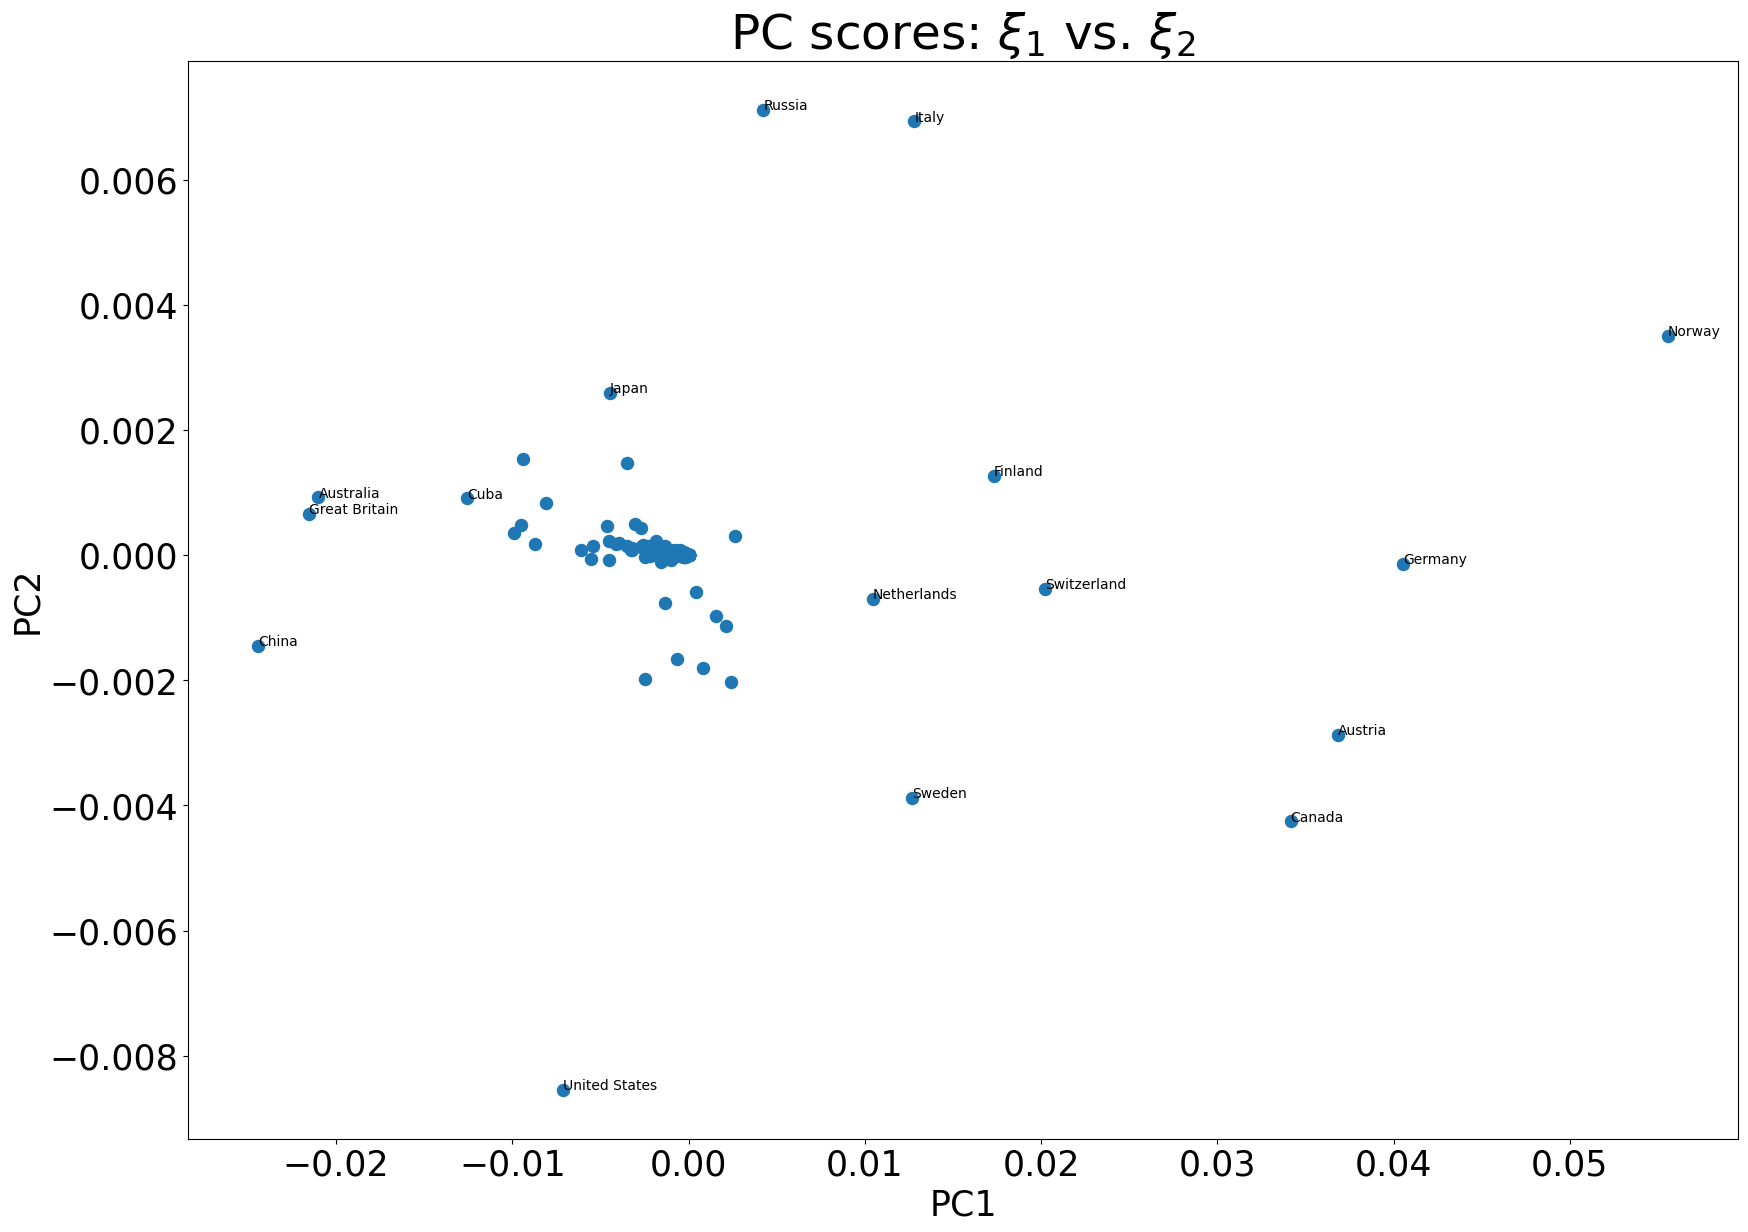

In [262]:
fig, ax = plt.subplots(figsize = (20, 14))
plot = scores.plot('PC1_score', 'PC2_score', kind='scatter', ax=ax,
                   title=r'PC scores: '+r'$\xi_1$'+' vs. '+r'$\xi_2$',
                  fontsize = 25, s=75)
                  
for i in scores.index:
    if abs(scores['PC1_score'][i]) > .01 or abs(scores['PC2_score'][i]) > .0025:
        ax.annotate(i, (scores['PC1_score'][i], scores['PC2_score'][i]))

plot.title.set_size(35)
plot.set_ylabel("PC2", fontsize=25)
plot.set_xlabel("PC1", fontsize=25)


Let's take the 4 countries described above as "archetypal" countries. Describe the "profiles" for each of these archetypes, using the first two principal components to depict trends in historical performance at the Olympics. (8 pts total, 2 pts for each archetype.)

<font color=#FF6666> 
I'm not sure exactly what four countries to refer to, but I will interpret four archetypes of countries by breaking the scatter plot up into quadrants and detailing characteristics of those quadrants (or archetypes). Starting in the lower left hand quardrant, where the US leads the way is an archetype of countries that are better at summer olympic games as well as are increasing medal counts as the years go on. In the lower right corner is an archetype that exhibits the same trend in increasing medal counts as the years go on however these countries are better at the winter olympics, with Canada leading the way. In the upper left corner is an archetype of countries that are better at the summer olympics but they have been declining in medal counts as the years go on, Russia is the largest outlier in this archetype. Lastly the upper right courner is an archetype of nations that are good at the winter olympics with there medal counts also declining in recent years. Norway most strongly represents this archetype, more so than any of the other outliers. 
 </font>

#### You can answer the following 2 questions either by justifying your answers with theory or by carrying it out in code and interpreting your findings:

Suppose I created a new second principal component vector: $\phi^*_2 = - \phi_2$. (This corresponds to a rotation of that principal component in the exact opposite direction it was facing.) What change will this have on second principal component scores? In other words, express the new PC scores $\xi^*_{i2}$ in terms of the values of $\xi_{i2}$ for $~ i =1,..., n$. (2pts)

<font color=#FF6666> 
The only change that switching the sign of the second pricnipal component will have will just be the opposite interpretation. So instead of a high PC2 score representing a country who had a higher medal count earlier in the years, a high PC2* will represent a country that has had a higher medal count in the more recent years (Opposite of PC2). 
 </font>

Text(0.5, 0, 'PC1')

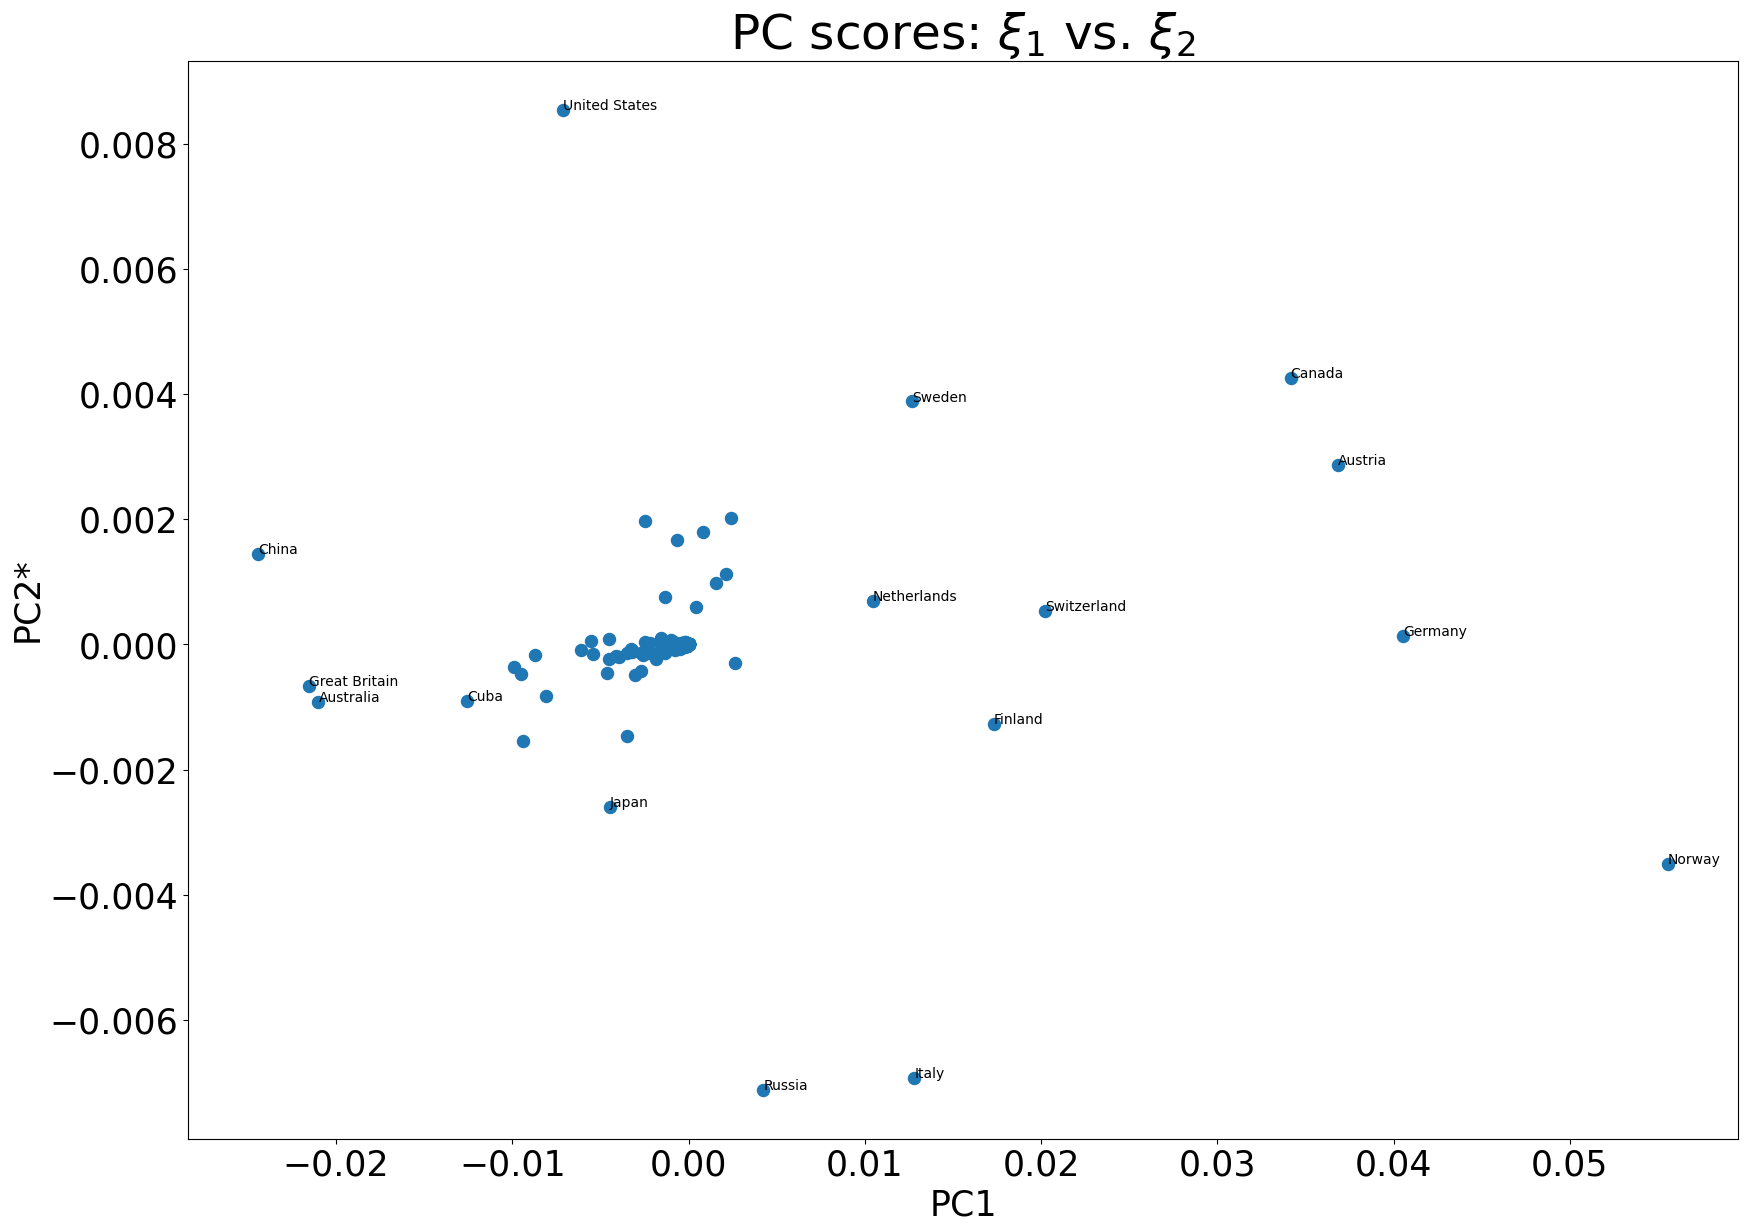

In [272]:
scores['PC2*_score'] = scores['PC2_score']*-1
fig, ax = plt.subplots(figsize = (20, 14))
plot = scores.plot('PC1_score', 'PC2*_score', kind='scatter', ax=ax,
                   title=r'PC scores: '+r'$\xi_1$'+' vs. '+r'$\xi_2$',
                  fontsize = 25, s=75)

for i in scores.index:
    if abs(scores['PC1_score'][i]) > .01 or abs(scores['PC2*_score'][i]) > .0025:
        ax.annotate(i, (scores['PC1_score'][i], scores['PC2*_score'][i]))

plot.title.set_size(35)
plot.set_ylabel("PC2*", fontsize=25)
plot.set_xlabel("PC1", fontsize=25)

Does making this change alter the decay shown in the scree plot? Why or why not? (2pt)

<font color=#FF6666> No, this change will not alter the decay shown on the scree plot becasue the amount of varianced explained does not depend on the sign of the pricipal components. </font>

### Bonus Section. Supervised learning using PCA results (5pts extra credit)



Suppose we wanted to examine the hypothesis that countries which are nearer to the poles perform better at the Winter Olympics than they do at the Summer Olympics. We can try to explore this by building a supervised learning model on top of our PCA results.

Define a target variable for our model which will capture the contrast between performance at the Winter Olympics and Summer Olympics. You must use a quantity given by our eigenanalysis. 

Then build a model which uses country-level metrics (like those given in country_stats.csv and country_locations.csv) to predict your response. Feel free to search for other useful predictors which could help your model perform better.

Which factors are most significant in predicting your response? How does this translate to patterns in the overall trajectories of medal counts over time? Are there any notable interactions? 

Interesting exercise: For each feature, hold the other predictors constant while varying the value of the feature in question. Then plot the rank k approximate trajectory for each of the predicted scores. Doing this allows you to see how that scalar feature can influence vector-valued (or function-valued) responses.

### Optional exercises to strengthen your understanding of PCA + visualization

1. Many countries have 0s across the board. Maybe we should remove them as they're just zero-inflating our observations. Devise a data-driven way of setting a threshold to exclude countries with zero (or very low) medal counts from this analysis.

2. Repeat PCA on the subset of countries which were not removed. Do the patterns in your eigenvectors change? How about the fraction of variance explained by them? 

3. Find the total medal counts for 2018, 2020, and 2022 online. Add them to the data frame and rerun the analysis. What changes? What trends remains the same?

4. Visualize the distribution of PC1 scores on a world map. Do the same for PC2 scores.